Problem statement:Prediction of bike rents based on time and wheather variables.

These are the libaries used for prediction.

In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [75]:
bike=pd.read_csv(r"C:\Users\Praveen\Desktop\ML\Data\hour.csv",index_col=0)

 
About the attributes:
 
     dteday : date
 
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [76]:
bike.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


Total data in numeric and no missing values.

In [77]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [78]:
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [79]:
bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [80]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

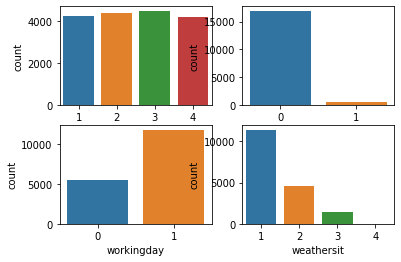

In [81]:
cat_nam=['season','holiday','workingday','weathersit']
i=0
for nam in cat_nam:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(nam,data=bike)
plt.show()

weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

season : 
        season (1:springer, 2:summer, 3:fall, 4:winter)
        
Interpret:
        1.People showed interest to rent a bike on dry days than cloudy.
        2.Demand for bikes is high on workingday and non holiday. 

In [82]:
bike.mnth.value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

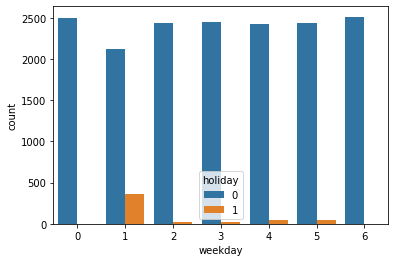

In [83]:
sns.countplot(x='weekday',hue='holiday',data=bike)

It is easily identified that more number of holidays fall on Tuesday.

1:springer, 2:summer, 3:fall, 4:winter


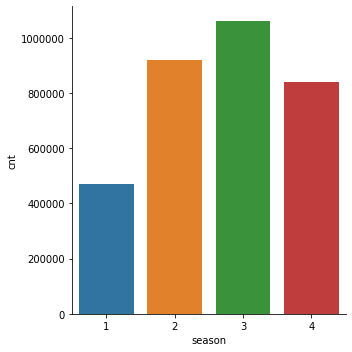

In [84]:
print("1:springer, 2:summer, 3:fall, 4:winter")
bike_season=pd.DataFrame(bike.groupby('season')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False))
sns.catplot(x='season',y='cnt',kind='bar',data=bike_season)

season : season (1:springer, 2:summer, 3:fall, 4:winter)

    Inference:
        Bikes demand is high in fall and low in spring.

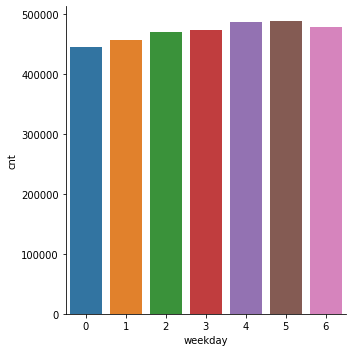

In [85]:
bike_weekday=pd.DataFrame(bike.groupby('weekday')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False))
sns.catplot(x='weekday',y='cnt',kind='bar',data=bike_weekday)

There is no significant difference daywise in bike rental.

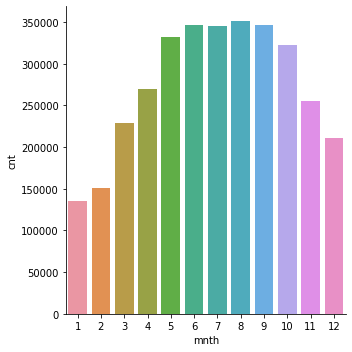

In [86]:
bike_mnth=pd.DataFrame(bike.groupby('mnth')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False))
sns.catplot(x='mnth',y='cnt',kind='bar',data=bike_mnth)

It looks like normal distibution, early and end of the year demand is low where as middle of the year is high in demand for bikes.

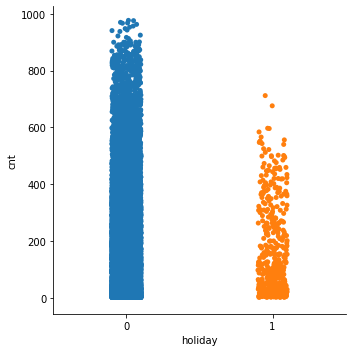

In [87]:
sns.catplot(x='holiday',y='cnt',data=bike)

Density and demand of bikes on non holidays is high.

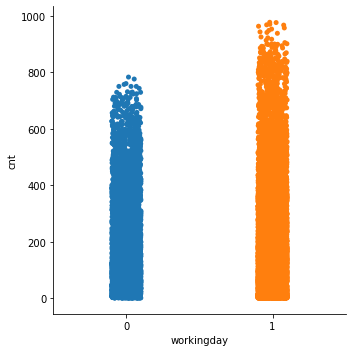

In [88]:
sns.catplot(x='workingday',y='cnt',data=bike)

Density and demand of bikes on working day is high.

If day is neither weekend nor holiday is 1, otherwise is 0

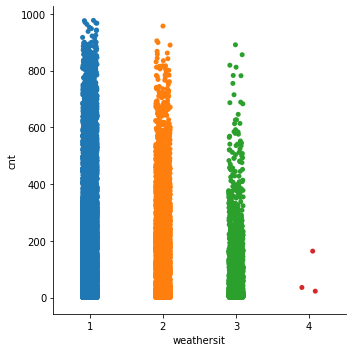

In [89]:
sns.catplot(x='weathersit',y='cnt',data=bike)

Preference to drive on dry wheather is high.

1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

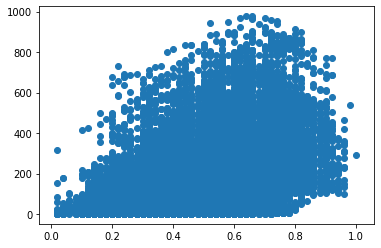

In [108]:
plt.scatter(x='temp',y='cnt',data=bike)

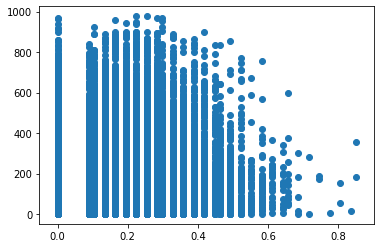

In [109]:
plt.scatter(x='windspeed',y='cnt',data=bike)

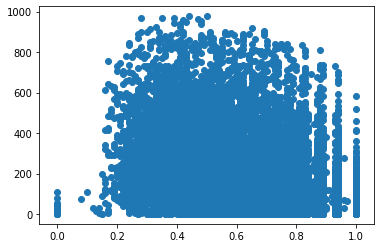

In [111]:
plt.scatter(x='hum',y='cnt',data=bike)

From the above three scatter plots,there is no linearity between independent and dependent varibles.

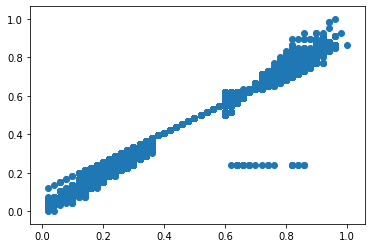

In [90]:
plt.scatter(x='temp',y='atemp',data=bike)

Above scatter shows, there is correlation.

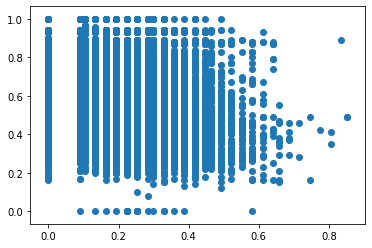

In [91]:
plt.scatter(x='windspeed',y='hum',data=bike)

I didnt find any pattern between windspeed and humidity.

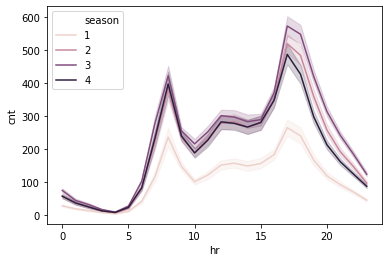

In [92]:
sns.lineplot(x='hr',y='cnt',hue='season',data=bike)

It is clearly visible that there are two peaks.

One peak around 7 to 9 clock while another is around 16 to 18 clock.

Demand is equal for three seasons where as demand in spring is low.

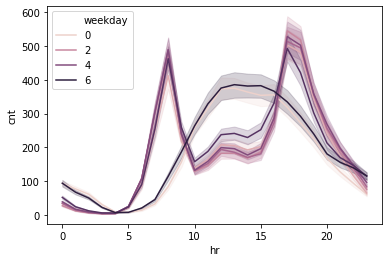

In [93]:
sns.lineplot(x='hr',y='cnt',hue='weekday',data=bike)

Rentals on weekdays and weekends are different.

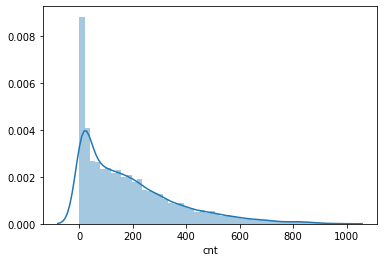

In [94]:
sns.distplot(bike['cnt'])

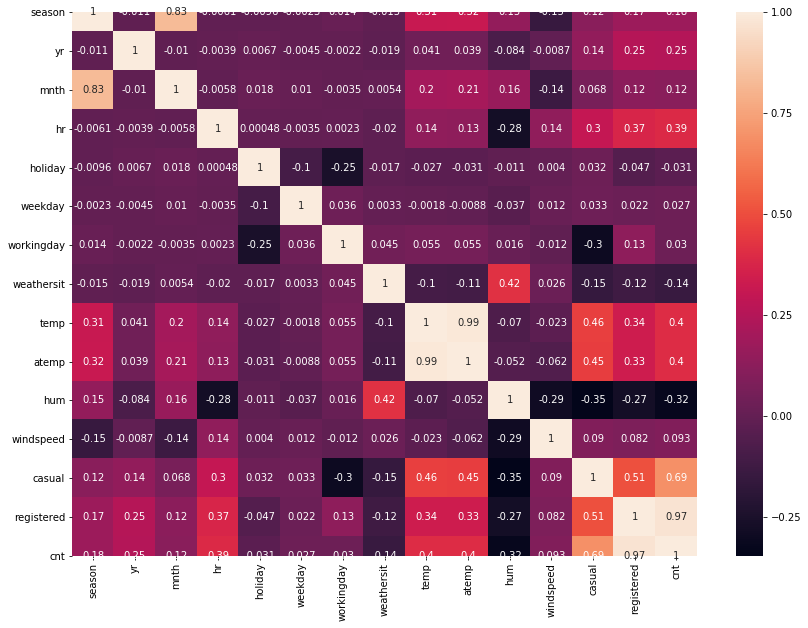

In [95]:
plt.figure(figsize=(14,10))
corr=bike.corr()
sns.heatmap(corr,annot=True)

Didnt find noticeable correlation except between temp and atemp

Dropped columns which are useless.

In [96]:
final_df=bike.drop(['dteday','atemp','casual','registered'],axis=1)
final_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
2,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
3,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
4,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
5,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [97]:
final_df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

Data is splited into input and output variables. 

Splited the data into train and test.

In [98]:
X=final_df.drop(['cnt'],axis=1)
y=final_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Build a model using random forest regression algorithm.

In [99]:
rf=RandomForestRegressor(n_estimators=50,random_state=42)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rf.score(X_test,y_test)

0.9426989194852169

In [100]:
rf.score(X_train,y_train)

0.991700762141778

Applied cross validation set to see results.

In [101]:
print(cross_val_score(rf, X_train, y_train,cv=10))

[0.94286373 0.94441943 0.92906992 0.9510701  0.9404758  0.93845245
 0.94943335 0.93941122 0.93759571 0.93907454]


Build a model using Linear regression algorithm but it looks bad fit.

In [102]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)

In [103]:
lr.score(X_test,y_test)

0.3850584879978659

In [104]:
lr.score(X_train,y_train)

0.38892571894208483

In [105]:
print(cross_val_score(lr, X_train, y_train,cv=10))

[0.37336306 0.39489116 0.3495335  0.39710961 0.40767277 0.38408839
 0.41402569 0.38819841 0.37784298 0.37765807]


To see which algorithm suits best based on R-square and RMSE.

In [106]:
models=[RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','LinearRegression','DecisionTreeRegressor','SVR','KNeighborsRegressor']
rmse=[]
r_squared=[]
dic={}
for model in range (len(models)):
    alg=models[model]
    alg.fit(X_train,y_train)
    alg_y_pred=alg.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,alg_y_pred)))
    r_squared.append(r2_score(y_test,alg_y_pred))
dic={'Modelling Algorithms':model_names,'RMSE':rmse,'R-Squared':r_squared}   
model_performances= pd.DataFrame(dic)

model_performances

C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Modelling Algorithms,RMSE,R-Squared
0,RandomForestRegressor,45.706297,0.937485
1,LinearRegression,143.351522,0.385058
2,DecisionTreeRegressor,60.831867,0.889263
3,SVR,123.144636,0.546204
4,KNeighborsRegressor,55.927490,0.906399


Random forest and KNN are best fits while Linear regression and SVR are worst fits.